In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures

x1: [0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]
x2: [0.05 0.15 0.25 0.35 0.45 0.55 0.65 0.75 0.85 0.95 1.05]
t1: [1.81536787 2.44170229 2.33673931 1.11312612 1.39273785 2.66763403
 3.80619265 3.36432146 2.81270759 2.48203084 4.13449033]
t2: [2.44011929 2.17094251 1.89886082 1.0433357  1.74813989 2.7060347
 3.14674936 2.79592355 2.68991964 3.34768651 5.09014116]


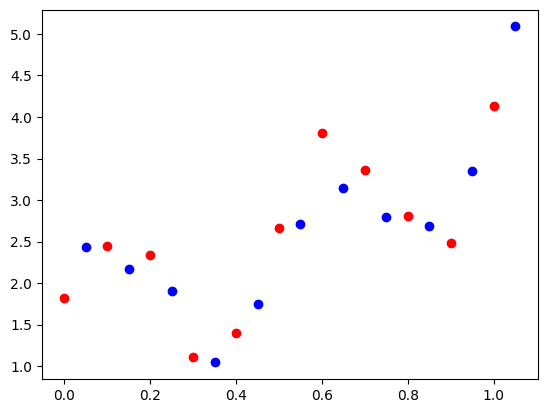

In [4]:
np.random.seed(195397) # 본인 학번 이용

x1 = np.linspace(0,1,11)
x2 = np.linspace(0+0.05,1+0.05,11)

print("x1:",x1)
print("x2:",x2)

t1 = np.sin(2*np.pi*2*x1) + np.exp(x1*1.2) + 1*np.random.rand(11)
t2 = np.sin(2*np.pi*2*x2) + np.exp(x2*1.2) + 1*np.random.rand(11)

print("t1:",t1)
print("t2:",t2)

plt.plot(x1,t1,'ro')
plt.plot(x2,t2,'bo')
plt.show()

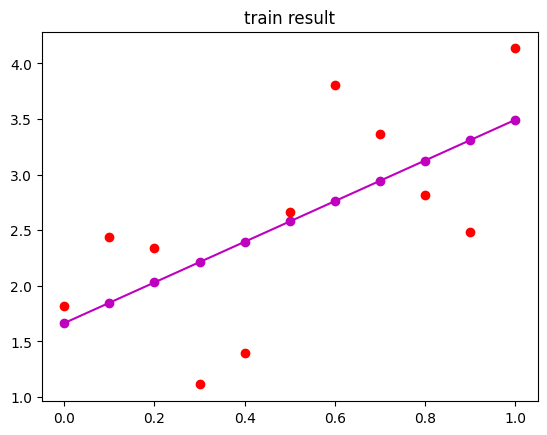

coef: [1.82733426]
intercept: 1.6651556295974208
y train: [1.81536787 2.44170229 2.33673931 1.11312612 1.39273785 2.66763403
 3.80619265 3.36432146 2.81270759 2.48203084 4.13449033]
pred train: [1.66515563 1.84788906 2.03062248 2.21335591 2.39608933 2.57882276
 2.76155618 2.94428961 3.12702304 3.30975646 3.49248989]
train mse: 0.4688884697518503


In [5]:
# Xtrain = x1.copy() 
Xtrain = x1.reshape(-1,1).copy()
ytrain = t1.copy()

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)

ptrain = model.predict(Xtrain)

# msetrain = np.mean(np.power(ptrain-ytrain,2))
msetrain = mean_squared_error(ytrain, ptrain)

plt.plot(x1,ptrain,'mo-')
plt.plot(x1,t1,'ro')
plt.title("train result")
plt.show()

print('coef:', model.coef_)
print('intercept:', model.intercept_) # 절편

print('y train:', ytrain)
print('pred train:',ptrain)
print("train mse:", msetrain)

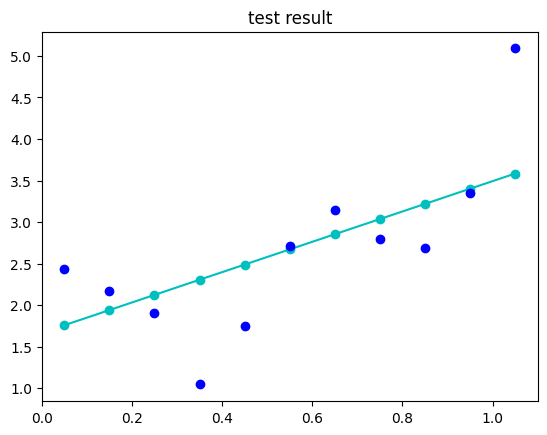

test mse: 0.4913250127297985


In [8]:
## test
Xtest = x2.reshape(-1,1).copy()
ytest = t2

ptest = model.predict(Xtest)

plt.plot(x2,ptest,'co-')
plt.plot(x2,t2,'bo')
plt.title("test result")
plt.show()

msetest = mean_squared_error(ytest, ptest)
print("test mse:", msetest)

-- Epoch 1
Norm: 0.02, NNZs: 1, Bias: 0.028185, T: 11, Avg. loss: 3.683983
Total training time: 0.00 seconds.
-- Epoch 2
Norm: 0.03, NNZs: 1, Bias: 0.055988, T: 22, Avg. loss: 3.589447
Total training time: 0.00 seconds.
-- Epoch 3
Norm: 0.05, NNZs: 1, Bias: 0.083383, T: 33, Avg. loss: 3.497520
Total training time: 0.00 seconds.
-- Epoch 4
Norm: 0.06, NNZs: 1, Bias: 0.110412, T: 44, Avg. loss: 3.408142
Total training time: 0.00 seconds.
-- Epoch 5
Norm: 0.08, NNZs: 1, Bias: 0.137045, T: 55, Avg. loss: 3.321224
Total training time: 0.00 seconds.
-- Epoch 6
Norm: 0.09, NNZs: 1, Bias: 0.163305, T: 66, Avg. loss: 3.236698
Total training time: 0.00 seconds.
-- Epoch 7
Norm: 0.11, NNZs: 1, Bias: 0.189217, T: 77, Avg. loss: 3.154510
Total training time: 0.00 seconds.
-- Epoch 8
Norm: 0.12, NNZs: 1, Bias: 0.214745, T: 88, Avg. loss: 3.074570
Total training time: 0.00 seconds.
-- Epoch 9
Norm: 0.14, NNZs: 1, Bias: 0.239922, T: 99, Avg. loss: 2.996848
Total training time: 0.00 seconds.
-- Epoch 1

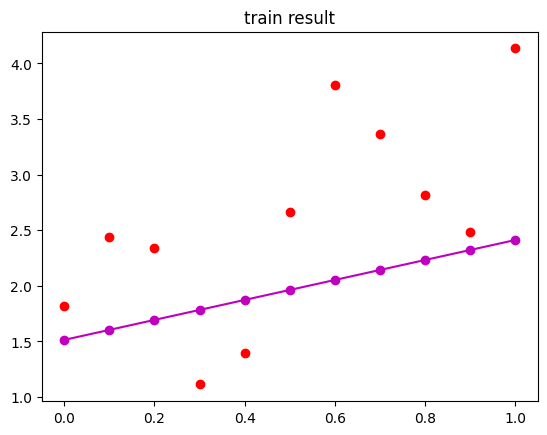

coef: [0.89784116]
intercept: [1.51414755]
y train: [1.81536787 2.44170229 2.33673931 1.11312612 1.39273785 2.66763403
 3.80619265 3.36432146 2.81270759 2.48203084 4.13449033]
pred train: [1.51414755 1.60393167 1.69371578 1.7834999  1.87328401 1.96306813
 2.05285225 2.14263636 2.23242048 2.32220459 2.41198871]
train mse: 0.9344379738772502


In [18]:
from sklearn.linear_model import SGDRegressor
 
Xtrain = x1.reshape(-1,1).copy()
ytrain = t1.copy()

model = SGDRegressor(loss="squared_error", 
                     penalty=None, 
                     fit_intercept=True, 
                     max_iter=100, 
                     tol=None,
                     learning_rate='constant',
                     eta0=0.001, #learning rate
                     verbose=1, # epoch 출력 1
                     random_state=195397 # seed 본인학번
)

model.fit(Xtrain,ytrain)

ptrain = model.predict(Xtrain)

msetrain = mean_squared_error(ytrain, ptrain)

plt.plot(x1,ptrain,'mo-')
plt.plot(x1,t1,'ro')
plt.title("train result")
plt.show()

print('coef:', model.coef_)
print('intercept:', model.intercept_)

print('y train:', ytrain)
print('pred train:',ptrain)
print("train mse:", msetrain)

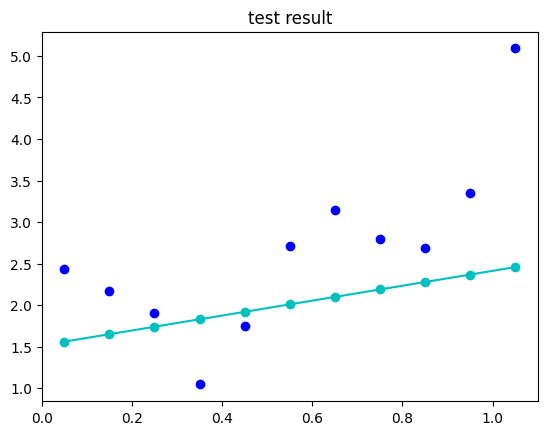

test mse: 1.0675947043169647


In [19]:
## test_mse
Xtest = x2.reshape(-1,1).copy()
ytest = t2

ptest = model.predict(Xtest)

plt.plot(x2,ptest,'co-')
plt.plot(x2,t2,'bo')
plt.title("test result")
plt.show()

msetest = mean_squared_error(ytest, ptest)
print("test mse:", msetest)

In [22]:
## x를 polynomial하게 변경하는 방법 (차수,interaction, bias)
Xtrain = PolynomialFeatures(2,interaction_only=False, include_bias=False).fit_transform( x1.reshape(-1,1) )
print(Xtrain)

[[0.   0.  ]
 [0.1  0.01]
 [0.2  0.04]
 [0.3  0.09]
 [0.4  0.16]
 [0.5  0.25]
 [0.6  0.36]
 [0.7  0.49]
 [0.8  0.64]
 [0.9  0.81]
 [1.   1.  ]]


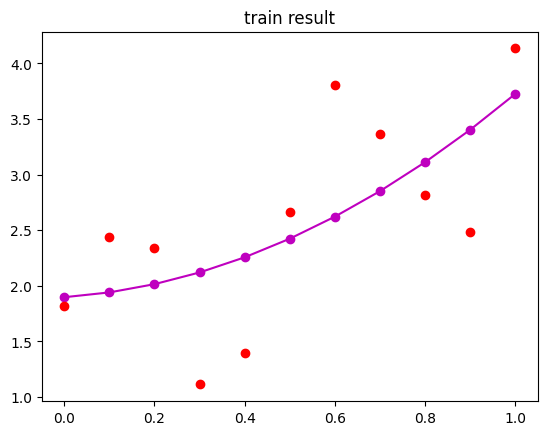

coef: [0.27611926 1.551215  ]
intercept: 1.897837879357382
y train: [1.81536787 2.44170229 2.33673931 1.11312612 1.39273785 2.66763403
 3.80619265 3.36432146 2.81270759 2.48203084 4.13449033]
pred train: [1.89783788 1.94096196 2.01511033 2.12028301 2.25647998 2.42370126
 2.62194683 2.85121671 3.11151089 3.40282936 3.72517214]
train mse: 0.45011957957601983


In [23]:
# Xtrain = x1.copy() 
# Xtrain = x1.reshape(-1,1).copy()
ytrain = t1.copy()

model = LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)

ptrain = model.predict(Xtrain)

# msetrain = np.mean(np.power(ptrain-ytrain,2))
msetrain = mean_squared_error(ytrain, ptrain)

plt.plot(x1,ptrain,'mo-')
plt.plot(x1,t1,'ro')
plt.title("train result")
plt.show()

print('coef:', model.coef_)
print('intercept:', model.intercept_) # 절편

print('y train:', ytrain)
print('pred train:',ptrain)
print("train mse:", msetrain)